# **ML Optimal BUS Allocation System**

## **Data Pre-Processing**

### Import the EHS and EPC datasets.

Note:
1. EHS dataset - 2018-2019 Teaching dataset
2. EPC dataset - 2008-2023

In [3]:
import pandas as pd
ehs = pd.read_csv(r"C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\EHS_dataset_2018-2019\UKDA-8717-tab\tab\ehs_1819_teaching.tab",
                  sep='\t')
ehs.head()

,serialanon,aagfh18,aagfh18new,gorehs,hhcomp1,hhtype6,hhsizex,ndepchild,noUnits1,agehrp4x,...,tenure2,tenure4,hhltsick,mortwkx,rentwkx,amthbenx,housbenx,JOINTINCx,HYEARGRx,hhvulx
0,18190000002,810.653613,0.462654,4,7,5,1,0,1,3,...,4,2,2,-9.000000,86.769231,0.0,2,6760.00000,6760.00000,2
1,18190000005,2757.284121,1.573631,10,7,5,1,0,1,3,...,2,1,1,80.769231,-9.000000,-9.0,-9,41175.00000,41175.00000,2
2,18190000006,708.592029,0.404406,1,1,1,2,0,1,4,...,4,2,1,-9.000000,107.000000,0.0,2,13336.00000,13336.00000,2
3,18190000008,3458.741069,1.973965,10,1,2,4,1,1,3,...,2,1,2,570.623527,-9.000000,-9.0,-9,54317.52966,54317.52966,2
4,18190000012,862.639366,0.492324,5,1,1,2,0,1,3,...,1,1,1,0.000000,-9.000000,-9.0,-9,46602.50000,46602.50000,2


In [4]:
ehs.columns

Index(['serialanon', 'aagfh18', 'aagfh18new', 'gorehs', 'hhcomp1', 'hhtype6',
       'hhsizex', 'ndepchild', 'noUnits1', 'agehrp4x', 'agehrp6x', 'emphrpx',
       'ethhrp2x', 'sexhrp', 'bedstdx', 'nbedsx', 'bedrqx', 'nrooms1a',
       'sharer', 'accomhh1', 'lenresb', 'ftbuyer', 'tenure2', 'tenure4',
       'hhltsick', 'mortwkx', 'rentwkx', 'amthbenx', 'housbenx', 'JOINTINCx',
       'HYEARGRx', 'hhvulx'],
      dtype='object')

In [5]:
# The dataset contains a lot of columns, but we are only interested in a few of them.
ehs_cols = [
    'gorehs',          # Government office region (gor) EHS version
    'hhtype6',           # Household type
    'hhsizex',           # Number of persons in the household
    'tenure2',           # Tenure group (or use 'tenure4' if preferred)
    'hhvulx',            # Household vulnerable (means-tested/disability benefits)
    'housbenx',         # Receives housing benefit
    'HYEARGRx'          # Household gross annual income
]

# Select only the columns we are interested in and rename them for clarity
ehs = ehs[ehs_cols]
ehs = ehs.rename(columns={
    'gorehs': 'gov_region',
    'hhtype6': 'household_type',
    'hhsizex': 'household_size',
    'tenure2': 'tenure_group',
    'hhvulx': 'household_vulnerable',
    'housbenx': 'receives_housing_benefit',
    'HYEARGRx': 'household_gross_income'
})

# Display the first few rows of the cleaned dataset
ehs.head()

,gov_region,household_type,household_size,tenure_group,household_vulnerable,receives_housing_benefit,household_gross_income
0,4,5,1,4,2,2,6760.00000
1,10,5,1,2,2,-9,41175.00000
2,1,1,2,4,2,2,13336.00000
3,10,2,4,2,2,-9,54317.52966
4,5,1,2,1,2,-9,46602.50000


In [6]:
ehs.describe(include='all')

,gov_region,household_type,household_size,tenure_group,household_vulnerable,receives_housing_benefit,household_gross_income
count,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000
mean,5.997320,2.961656,2.385452,2.693098,1.703001,-4.231033,36412.092612
std,2.817189,1.905888,1.328409,1.556457,0.456953,5.268729,24902.735123
min,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,3011.000000
25%,4.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,16923.650000
50%,6.000000,2.000000,2.000000,2.000000,2.000000,-9.000000,29900.000000
75%,9.000000,5.000000,3.000000,4.000000,2.000000,2.000000,49140.000000
max,10.000000,6.000000,9.000000,6.000000,2.000000,2.000000,100000.000000


In [7]:
ehs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13431 entries, 0 to 13430
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gov_region                13431 non-null  int64  
 1   household_type            13431 non-null  int64  
 2   household_size            13431 non-null  int64  
 3   tenure_group              13431 non-null  int64  
 4   household_vulnerable      13431 non-null  int64  
 5   receives_housing_benefit  13431 non-null  int64  
 6   household_gross_income    13431 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 734.6 KB


In [8]:
ehs.isnull().sum()

gov_region                  0
household_type              0
household_size              0
tenure_group                0
household_vulnerable        0
receives_housing_benefit    0
household_gross_income      0
dtype: int64

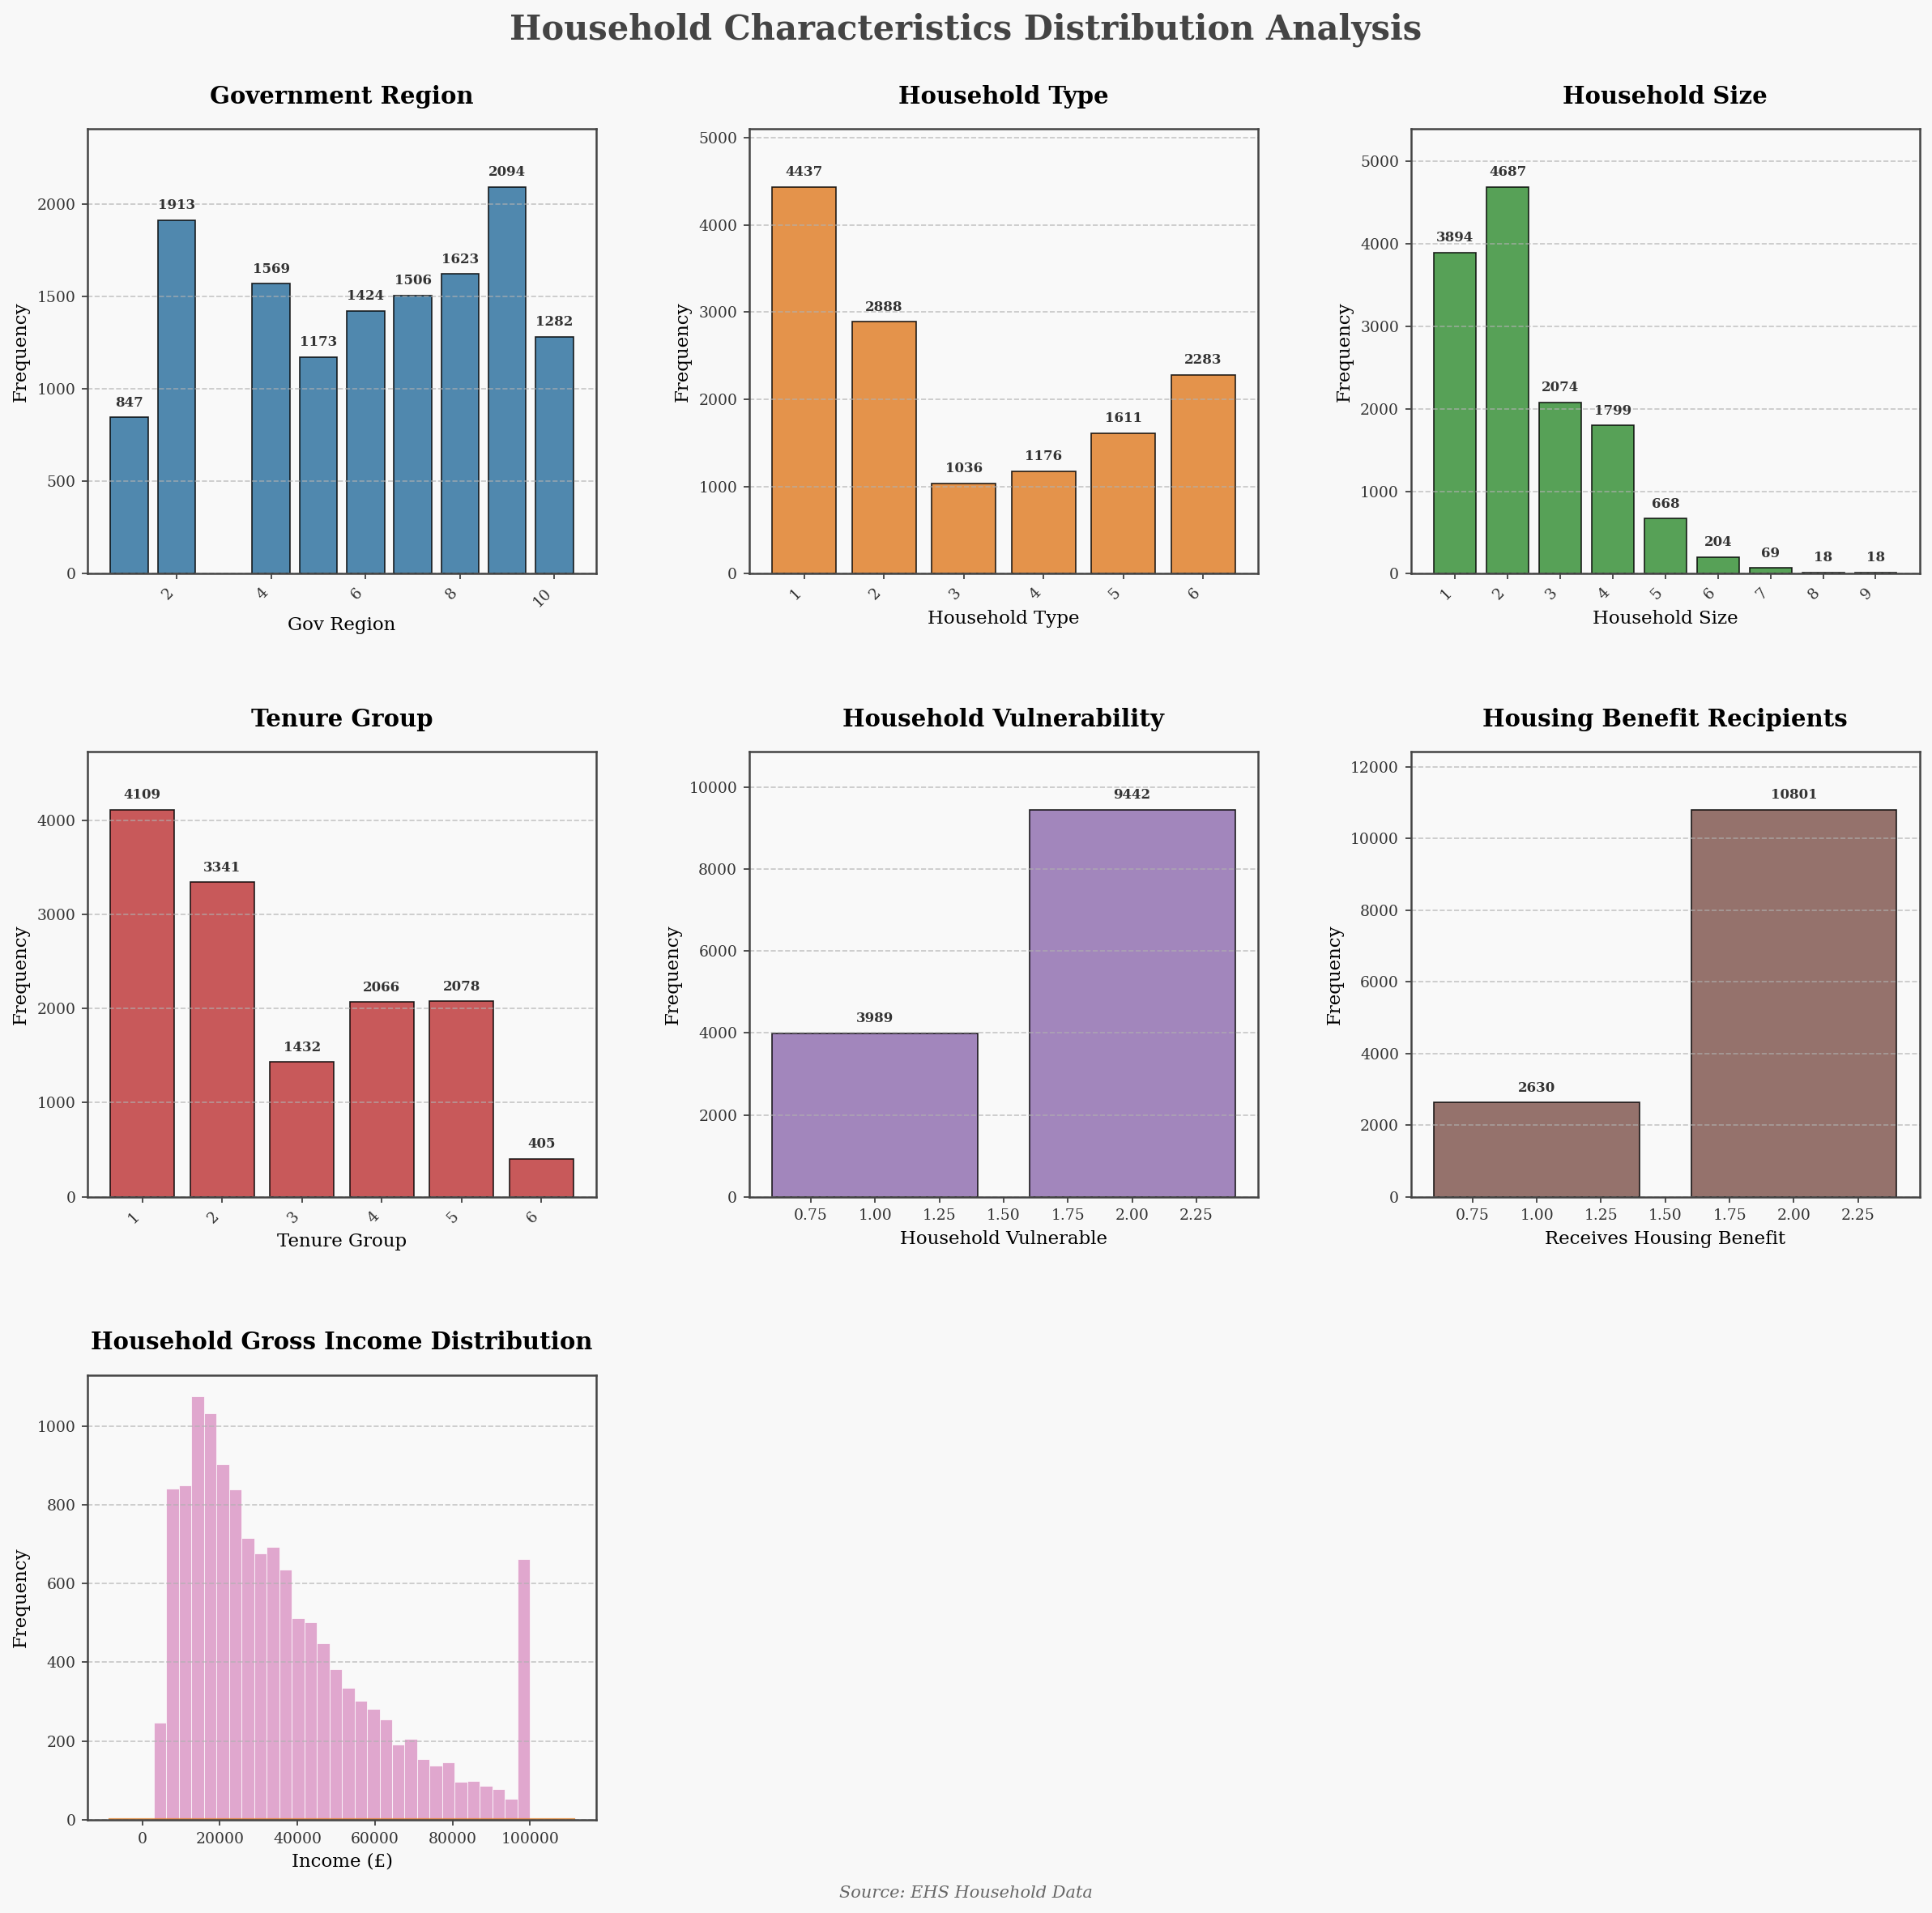

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the dataframe is named 'ehs'
# If you have the data in a file, you would load it like:
# ehs = pd.read_csv('your_file.csv')

ehs['receives_housing_benefit'] = ehs['receives_housing_benefit'].replace({-9: 2})

# Remap gov_region to new column gov_region_numeric
region_mapping = {
    "North East": 1,
    "North West": 2,
    "Yorkshire and the Humber": 4,
    "East Midlands": 5,
    "West Midlands": 6,
    "East": 7,
    "London": 8,
    "South East": 9,
    "South West": 10
}
ehs['gov_region_numeric'] = ehs['gov_region'].map(region_mapping)

# Set figure aesthetics for academic presentation
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.edgecolor'] = '#333333'

# Create a professional color palette with a bit of pop
colors = ['#3274A1', '#E1812C', '#3A923A', '#C03D3E', '#9372B2', '#845B53', '#D684BD']
custom_palette = sns.color_palette(colors)
sns.set_palette(custom_palette)

# Create a figure with subplots in a grid - increase vertical space
fig, axes = plt.subplots(3, 3, figsize=(16, 16), dpi=150)  # Increased height from 14 to 16
fig.suptitle('Household Characteristics Distribution Analysis', 
             fontsize=20, y=0.98, fontweight='bold', color='#444444')

# Add a subtle background color
fig.patch.set_facecolor('#F8F8F8')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each categorical variable as a bar chart
categorical_cols = ['gov_region', 'household_type', 'household_size', 
                    'tenure_group', 'household_vulnerable', 'receives_housing_benefit']

# Dictionary for more descriptive titles
title_map = {
    'gov_region': 'Government Region',
    'household_type': 'Household Type',
    'household_size': 'Household Size',
    'tenure_group': 'Tenure Group',
    'household_vulnerable': 'Household Vulnerability',
    'receives_housing_benefit': 'Housing Benefit Recipients'
}

for i, col in enumerate(categorical_cols):
    # Count values in each category
    value_counts = ehs[col].value_counts().sort_index()
    
    # Create bar chart with enhanced styling
    ax = axes[i]
    bars = ax.bar(value_counts.index, value_counts.values, 
                 color=colors[i % len(colors)], alpha=0.85, 
                 edgecolor='black', linewidth=0.8)
    
    # Add data labels above bars with more vertical space
    if len(value_counts) <= 15:  # Allow more bars to have labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., 
                   height + 0.02*max(value_counts.values),  # Reduced spacing to avoid title overlap
                   f'{int(height)}', ha='center', va='bottom', fontsize=8, 
                   color='#333333', fontweight='bold')
    
    # Set titles and labels with improved styling and more padding
    ax.set_title(title_map.get(col, col.replace("_", " ").title()), 
                fontsize=14, pad=15, fontweight='bold')  # Increased padding
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Customize spines
    for spine in ax.spines.values():
        spine.set_edgecolor('#444444')
    
    # Special handling for Household Size x-axis labels
    if col == 'household_size':
        # Ensure x-axis ticks and labels are properly set
        ax.set_xticks(list(value_counts.index))
        ax.set_xticklabels([str(x) for x in value_counts.index])
    
    # Rotate x-axis labels if there are many categories
    if len(value_counts) > 5:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Set background color
    ax.set_facecolor('#F9F9F9')
    
    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=9, colors='#333333')
    
    # Give more vertical space for the annotations
    y_max = max(value_counts.values) * 1.15  # Increase y-axis limit by 15%
    ax.set_ylim(0, y_max)

# Plot income data separately with both histogram and KDE
income_data = ehs['household_gross_income'].dropna()
ax = axes[6]

# Create histogram
n, bins, patches = ax.hist(income_data, bins=30, 
                          color=colors[6], alpha=0.7,
                          edgecolor='white', linewidth=0.5)

# Add KDE on top
if len(income_data) > 0:  # Only compute KDE if we have data
    kde_xs = np.linspace(income_data.min(), income_data.max(), 300)
    kde = sns.kdeplot(income_data, ax=ax, color='#E1812C', 
                     linewidth=2, alpha=0.8)

# Styling for income plot
ax.set_title('Household Gross Income Distribution', fontsize=14, pad=15, fontweight='bold')
ax.set_xlabel('Income (£)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('#F9F9F9')
ax.tick_params(axis='both', which='major', labelsize=9, colors='#333333')

# Add subtle box around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('#444444')

# Remove empty subplots
for i in range(7, 9):
    fig.delaxes(axes[i])

# Add a caption/footer with data source information
plt.figtext(0.5, 0.01, 'Source: EHS Household Data', 
           ha='center', fontsize=10, style='italic', color='#666666')

# Adjust layout with more space between plots
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.05, hspace=0.4, wspace=0.3)  # Increased hspace

# Show the plot
plt.show()

In [ ]:
ehs.head()

,gov_region,household_type,household_size,tenure_group,household_vulnerable,receives_housing_benefit,household_gross_income,Grant_Eligible_EHS,gov_region_numeric
0,Yorkshire and the Humber,5,1.0,4,2,2,6760.00000,1,4
1,South West,5,1.0,2,2,2,41175.00000,0,10
2,North East,1,2.0,4,2,2,13336.00000,1,1
3,South West,2,4.0,2,2,2,54317.53125,0,10
4,East Midlands,1,2.0,1,2,2,46602.50000,0,5


In [8]:
# Import the epc dataset
import os
import pandas as pd

# The EPC dataset contains multiple CSV files. Loop through each subdirectory to find and process them
# Due to memory constraints, we will process each file one at a time and append the results to a single CSV file
# Define the path to the root EPC dataset folder
root_folder = r"C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset"

# Output CSV path
output_csv = r"C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset\epc_df_filtered.csv"

# Define the columns to keep
columns_to_keep = [
    'UPRN', 'POSTCODE', 'PROPERTY_TYPE', 'BUILT_FORM',
    'CURRENT_ENERGY_RATING', 'HEATING_COST_CURRENT',
    'CO2_EMISSIONS_CURRENT', 'TOTAL_FLOOR_AREA',
    'MAINHEAT_DESCRIPTION', 'MAIN_FUEL',
    'CONSTRUCTION_AGE_BAND', 'LOCAL_AUTHORITY', 'COUNTY'
]

# Track if header was already written
header_written = False

# Loop through all subdirectories and process each certificates.csv
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.startswith("certificates") and file.endswith(".csv"):
            file_path = os.path.join(subdir, file)
            try:
                df = pd.read_csv(file_path, usecols=columns_to_keep, low_memory=False)
                
                # Write to CSV incrementally
                df.to_csv(output_csv, mode='a', index=False, header=not header_written)
                header_written = True  # Only write header once
                print(f"Appended: {file_path}")
            except Exception as e:
                print(f"Failed to load {file_path}: {e}")

print("✅ All files processed and written to:", output_csv)

Appended: C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset\domestic-E06000001-Hartlepool\certificates.csv
Appended: C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset\domestic-E06000002-Middlesbrough\certificates.csv
Appended: C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset\domestic-E06000003-Redcar-and-Cleveland\certificates.csv
Appended: C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset\domestic-E06000004-Stockton-on-Tees\certificates.csv
Appended: C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset\domestic-E06000005-Darlington\cer

In [9]:
import pandas as pd
output_csv = r"C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\epc_dataset\epc_df_filtered.csv"

epc_df = pd.read_csv(output_csv)
epc_df.head()

C:\Users\Oke\AppData\Local\Temp\ipykernel_18816\322566418.py:4: DtypeWarning: Columns (4,5,6,7,8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  epc_df = pd.read_csv(output_csv)


,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,COUNTY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,CONSTRUCTION_AGE_BAND,UPRN
0,TS25 3JH,E,Flat,End-Terrace,E06000001,NaN,3.2,119.0,36.0,Electric storage heaters,electricity (not community),England and Wales: 1983-1990,100110786110.0
1,TS24 0ET,D,House,Mid-Terrace,E06000001,NaN,3.5,666.0,88.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,100110027519.0
2,TS24 8QQ,D,House,Semi-Detached,E06000001,NaN,5.5,1018.0,110.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1930-1949,100110006126.0
3,TS25 1QY,D,House,End-Terrace,E06000001,NaN,3.7,590.0,68.18,"Boiler and radiators, mains gas",mains gas - this is for backwards compatibilit...,England and Wales: 1930-1949,100110016771.0
4,TS25 1XA,D,House,Detached,E06000001,NaN,6.0,1051.0,144.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1967-1975,100110033299.0


In [8]:
epc_df.columns

Index(['POSTCODE', 'CURRENT_ENERGY_RATING', 'PROPERTY_TYPE', 'BUILT_FORM',
       'LOCAL_AUTHORITY', 'COUNTY', 'CO2_EMISSIONS_CURRENT',
       'HEATING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'MAINHEAT_DESCRIPTION',
       'MAIN_FUEL', 'CONSTRUCTION_AGE_BAND', 'UPRN'],
      dtype='object')

In [11]:
epc_df.head(2)

,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,COUNTY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,CONSTRUCTION_AGE_BAND,UPRN
0,TS25 3JH,E,Flat,End-Terrace,E06000001,NaN,3.2,119.0,36.0,Electric storage heaters,electricity (not community),England and Wales: 1983-1990,100110786110.0
1,TS24 0ET,D,House,Mid-Terrace,E06000001,NaN,3.5,666.0,88.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,100110027519.0


In [ ]:
epc_df.describe(include='all')

,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,COUNTY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,CONSTRUCTION_AGE_BAND,UPRN
count,55313487,55313487,55313487,55302611,55309521,25974803,55313487.0,55299357.0,55313483.0,55313353,54997125,54779733,54262635.0
unique,1381955,9,6,8,347,29,1658.0,17387.0,145794.0,1327,70,147,19029195.0
top,E14 9GU,D,House,Semi-Detached,E08000025,Greater London Authority,2.7,432.0,70.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,384131.0
freq,1638,20607488,33446604,16843360,1030518,6047044,1294323.0,70557.0,735161.0,41755516,31554490,8488830,600.0


In [ ]:
epc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55313487 entries, 0 to 55313486
Data columns (total 13 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   POSTCODE               object
 1   CURRENT_ENERGY_RATING  object
 2   PROPERTY_TYPE          object
 3   BUILT_FORM             object
 4   LOCAL_AUTHORITY        object
 5   COUNTY                 object
 6   CO2_EMISSIONS_CURRENT  object
 7   HEATING_COST_CURRENT   object
 8   TOTAL_FLOOR_AREA       object
 9   MAINHEAT_DESCRIPTION   object
 10  MAIN_FUEL              object
 11  CONSTRUCTION_AGE_BAND  object
 12  UPRN                   object
dtypes: object(13)
memory usage: 5.4+ GB


In [ ]:
epc_df.columns

Index(['POSTCODE', 'CURRENT_ENERGY_RATING', 'PROPERTY_TYPE', 'BUILT_FORM',
       'LOCAL_AUTHORITY', 'COUNTY', 'CO2_EMISSIONS_CURRENT',
       'HEATING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'MAINHEAT_DESCRIPTION',
       'MAIN_FUEL', 'CONSTRUCTION_AGE_BAND', 'UPRN'],
      dtype='object')

### Data Cleaning

Perform the following:
1. Handle missing values
2. Create mapping to merge EHS and EPC datasets
3. Merge datasets
4. Investigate key features
5. Define target variable
6. Investigate class imbalance of the target variable

In [10]:
# Create a 'gov_region' column in the EPC DataFrame by mapping local authority codes to government regions
# This would enable us to merge the EPC data with the EHS data based on government regions
import pandas as pd

# 1) Load the mapping CSV which contains local authority codes and their corresponding government regions
lookup_path = r"C:\Users\Oke\Documents\UCL MSc ESDA\ESDA_Term 2\BENV0092 Energy Data Analytics in the Built Environment\Final Coursework\datasets\Local_Authority_District_to_Region_in_England.csv"
lookup_df = pd.read_csv(
    lookup_path,
    usecols=['LAD23CD', 'RGN23NM'],
    dtype=str
)

# 2) Build a dict: local-authority code → region name
la_to_region = lookup_df.set_index('LAD23CD')['RGN23NM'].to_dict()

# 3) Map onto the EPC DataFrame
#    Make sure epc_df['LOCAL_AUTHORITY'] is string dtype:
epc_df['LOCAL_AUTHORITY'] = epc_df['LOCAL_AUTHORITY'].astype(str)

# 4) Create the new column, filling missing matches with "Other"
epc_df['gov_region'] = epc_df['LOCAL_AUTHORITY'].map(la_to_region).fillna('Other')

# 5) Quick check
epc_df.head(10)

,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,COUNTY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,CONSTRUCTION_AGE_BAND,UPRN,gov_region
0,TS25 3JH,E,Flat,End-Terrace,E06000001,NaN,3.2,119.0,36.0,Electric storage heaters,electricity (not community),England and Wales: 1983-1990,100110786110.0,North East
1,TS24 0ET,D,House,Mid-Terrace,E06000001,NaN,3.5,666.0,88.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,100110027519.0,North East
2,TS24 8QQ,D,House,Semi-Detached,E06000001,NaN,5.5,1018.0,110.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1930-1949,100110006126.0,North East
3,TS25 1QY,D,House,End-Terrace,E06000001,NaN,3.7,590.0,68.18,"Boiler and radiators, mains gas",mains gas - this is for backwards compatibilit...,England and Wales: 1930-1949,100110016771.0,North East
4,TS25 1XA,D,House,Detached,E06000001,NaN,6.0,1051.0,144.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1967-1975,100110033299.0,North East
5,TS24 8RF,D,Bungalow,Semi-Detached,E06000001,NaN,3.1,589.0,58.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1991-1995,100110033604.0,North East
6,TS24 8JA,E,House,Semi-Detached,E06000001,NaN,4.7,638.0,77.8,"Boiler and radiators, mains gas",mains gas - this is for backwards compatibilit...,England and Wales: 1950-1966,100110005936.0,North East
7,TS26 9BJ,D,House,End-Terrace,E06000001,NaN,4.5,784.0,74.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1900-1929,100110001728.0,North East
8,TS24 9BT,C,Flat,Semi-Detached,E06000001,NaN,1.7,310.0,49.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,100110000793.0,North East
9,TS24 8EQ,C,Flat,Semi-Detached,E06000001,NaN,1.5,293.0,50.71,"Boiler and radiators, mains gas",mains gas - this is for backwards compatibilit...,England and Wales: 1967-1975,100110012920.0,North East


In [ ]:
epc_df.describe(include='all')

,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,COUNTY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,CONSTRUCTION_AGE_BAND,UPRN,gov_region
count,55313487,55313487,55313487,55302611,55313487,25974803,55313487.0,55299357.0,55313483.0,55313353,54997125,54779733,54262635.0,55313487
unique,1381955,9,6,8,348,29,1658.0,17387.0,145794.0,1327,70,147,19029195.0,10
top,E14 9GU,D,House,Semi-Detached,E08000025,Greater London Authority,2.7,432.0,70.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,384131.0,London
freq,1638,20607488,33446604,16843360,1030518,6047044,1294323.0,70557.0,735161.0,41755516,31554490,8488830,600.0,8433464


In [9]:
# Check for missing values in each column
epc_df.isnull().sum()

POSTCODE                        0
CURRENT_ENERGY_RATING           0
PROPERTY_TYPE                   0
BUILT_FORM                  10876
LOCAL_AUTHORITY              3966
COUNTY                   29338684
CO2_EMISSIONS_CURRENT           0
HEATING_COST_CURRENT        14130
TOTAL_FLOOR_AREA                4
MAINHEAT_DESCRIPTION          134
MAIN_FUEL                  316362
CONSTRUCTION_AGE_BAND      533754
UPRN                      1050852
dtype: int64

#### Handle missing values

In [11]:
# 1) Drop unnecessary columns
epc_df = epc_df.drop(columns=['COUNTY', 'UPRN'])

# 2) Remove invalid entries
valid_ratings = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
epc_df = epc_df[
    epc_df['CURRENT_ENERGY_RATING'].isin(valid_ratings) &
    ~epc_df['BUILT_FORM'].isin(['NO DATA!', 'Unknown','BUILT_FORM'])
]

# 3) Handle missing values
epc_df = epc_df.dropna(subset=['TOTAL_FLOOR_AREA'])

epc_df['HEATING_COST_CURRENT'] = pd.to_numeric(
    epc_df['HEATING_COST_CURRENT'], errors='coerce'
)
epc_df['HEATING_COST_CURRENT'] = (
    epc_df['HEATING_COST_CURRENT']
    .fillna(epc_df.groupby('PROPERTY_TYPE')['HEATING_COST_CURRENT'].transform('median'))
    .fillna(epc_df['HEATING_COST_CURRENT'].median())
)

# Categorical columns
for col in ['BUILT_FORM', 'MAINHEAT_DESCRIPTION', 'MAIN_FUEL', 'CONSTRUCTION_AGE_BAND']:
    epc_df[col] = epc_df[col].fillna('Unknown')

# 4) Clean postcodes
epc_df['POSTCODE'] = epc_df['POSTCODE'].str.replace(r'\s+', '', regex=True)

# Final check
print("Remaining Missing Values:")
epc_df.isnull().sum()

Remaining Missing Values:


POSTCODE                 0
CURRENT_ENERGY_RATING    0
PROPERTY_TYPE            0
BUILT_FORM               0
LOCAL_AUTHORITY          0
CO2_EMISSIONS_CURRENT    0
HEATING_COST_CURRENT     0
TOTAL_FLOOR_AREA         0
MAINHEAT_DESCRIPTION     0
MAIN_FUEL                0
CONSTRUCTION_AGE_BAND    0
gov_region               0
dtype: int64

#### Standardize the fuel/heating types into broad categories

In [18]:
epc_df['MAIN_FUEL'].value_counts()

MAIN_FUEL
mains gas (not community)                                                        31554490
mains gas - this is for backwards compatibility only and should not be used      10370944
electricity (not community)                                                       4815580
oil (not community)                                                               1467130
electricity - this is for backwards compatibility only and should not be used     1344524
                                                                                   ...   
Electricity: electricity displaced from grid                                            2
biodiesel from used cooking oil only                                                    2
B30K                                                                                    2
biodiesel from vegetable oil only (community)                                           2
MAIN_FUEL                                                                               1


In [12]:
# 1) Define a mapping function
def simplify_fuel_type(fuel):
    fuel = str(fuel).lower()
    if any(x in fuel for x in ['backwards', 'no data', 'no heating', 'invalid']):
        return 'unknown/invalid'
    # Check specific fuels first
    if 'lpg' in fuel:
        return 'lpg'
    if 'gas' in fuel:
        return 'gas'
    if 'electric' in fuel:
        return 'electricity'
    if 'oil' in fuel:
        return 'oil'
    if 'coal' in fuel:
        return 'coal'
    if 'wood' in fuel or 'biomass' in fuel:
        return 'biomass/wood'
    if 'heat network' in fuel:
        return 'heat network'
    return 'other'

# 2) Apply the mapping
epc_df['heating_type'] = epc_df['MAIN_FUEL'].apply(simplify_fuel_type)

# 3) Filter out the values where 'heating_type' is 'unknown/invalid'
epc_df = epc_df[epc_df['heating_type'] != 'unknown/invalid']

# 4) Check the unique values in 'heating_type'
epc_df['heating_type'].value_counts()

heating_type
gas             33669916
electricity      5810446
oil              1493914
other             348640
lpg               321152
biomass/wood      198774
coal               88926
heat network        1990
Name: count, dtype: int64

In [12]:
epc_df.head()

,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,CONSTRUCTION_AGE_BAND,gov_region,heating_type
0,TS253JH,E,Flat,End-Terrace,E06000001,3.2,119.0,36.0,Electric storage heaters,electricity (not community),England and Wales: 1983-1990,North East,electricity
1,TS240ET,D,House,Mid-Terrace,E06000001,3.5,666.0,88.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,North East,gas
2,TS248QQ,D,House,Semi-Detached,E06000001,5.5,1018.0,110.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1930-1949,North East,gas
4,TS251XA,D,House,Detached,E06000001,6.0,1051.0,144.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1967-1975,North East,gas
5,TS248RF,D,Bungalow,Semi-Detached,E06000001,3.1,589.0,58.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1991-1995,North East,gas


C:\Users\Oke\AppData\Local\Temp\ipykernel_18816\3887294784.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Oke\AppData\Local\Temp\ipykernel_18816\3887294784.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Oke\AppData\Local\Temp\ipykernel_18816\3887294784.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Oke\AppData\Local\Temp\ipykernel_18816\3887294784.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and 

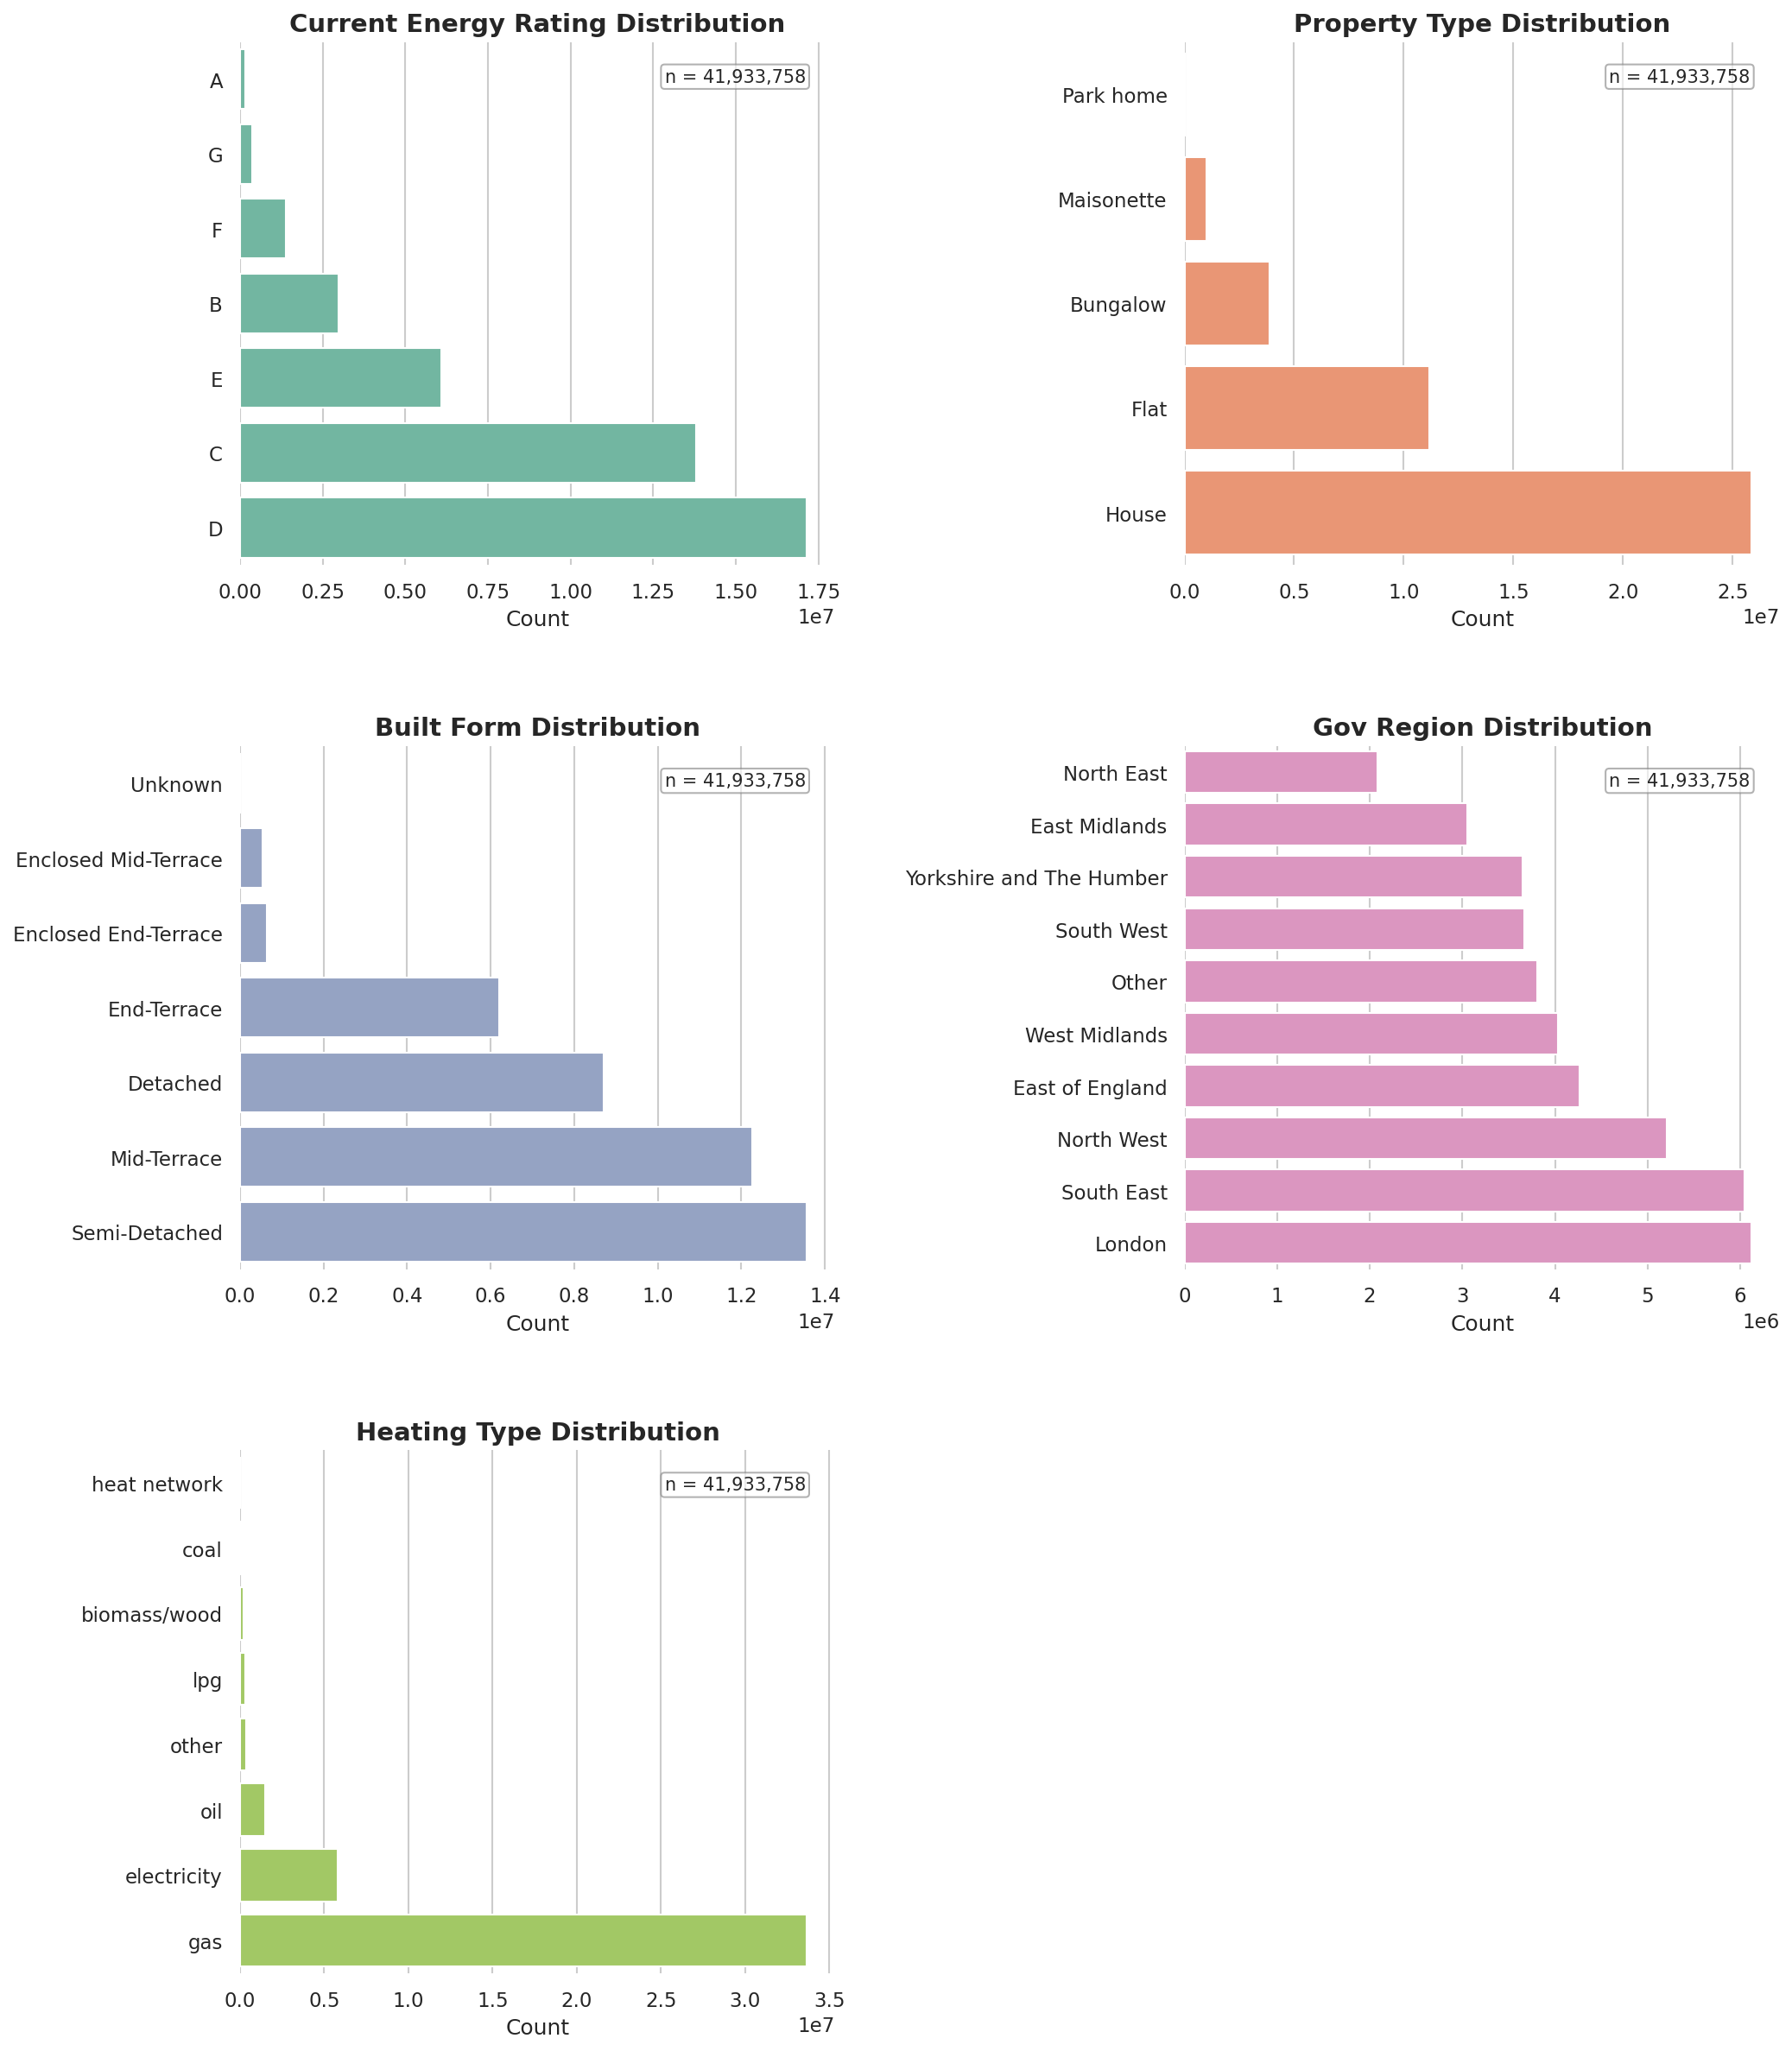

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume epc_df is already loaded

# Configure style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'DejaVu Sans'

# Only categorical columns
columns_to_plot = [
    'CURRENT_ENERGY_RATING',
    'PROPERTY_TYPE',
    'BUILT_FORM',
    'gov_region',
    'heating_type'
]

# Create a distinct color per plot
palette = sns.color_palette("Set2", len(columns_to_plot))

# 3×2 grid for 6 plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    counts = epc_df[col].value_counts().sort_values(ascending=True)

    sns.barplot(
        x=counts.values,
        y=counts.index,
        ax=ax,
        palette=[palette[i]] * len(counts)
    )

    # Title and labels
    ax.set_title(f"{col.replace('_', ' ').title()} Distribution", fontsize=14, weight='bold')
    ax.set_xlabel("Count", fontsize=12)
    ax.set_ylabel("")

    # Single annotation for total count
    total = counts.sum()
    ax.text(
        0.95, 0.95,
        f"n = {total:,}",
        transform=ax.transAxes,
        ha="right",
        va="top",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.6)
    )

    sns.despine(left=True, bottom=True)

# Hide any unused axes
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(h_pad=4, w_pad=3)
plt.show()


In [25]:
epc_df.describe(include='all')

,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,gov_region,heating_type
count,42319757,42319757,42319757,42319757,42319757,4.231976e+07,4.231976e+07,42319757.0,42319757,42319757,42319757,42319757
unique,1338322,9,6,9,348,NaN,NaN,64280.0,1184,59,10,7
top,E149GU,D,House,Semi-Detached,E08000025,NaN,NaN,84.0,"Boiler and radiators, mains gas",mains gas (not community),London,gas
freq,1638,17261126,25867724,13569926,833534,NaN,NaN,662585.0,32139996,31554490,6227514,33885924
mean,NaN,NaN,NaN,NaN,NaN,3.949589e+00,7.587928e+02,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.155499e+00,6.674010e+02,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-2.854800e+03,-9.442690e+05,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.300000e+00,4.150000e+02,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.300000e+00,6.160000e+02,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.800000e+00,9.130000e+02,NaN,NaN,NaN,NaN,NaN


## **Modelling**

Since the EHS and EPC datasets do not have an ID column to merge the datasets at a granular level, individual models are trained using each dataset.

Then, the models are stacked together in an ensemble to generate the final model.

In [77]:
epc_df.columns

Index(['POSTCODE', 'CURRENT_ENERGY_RATING', 'PROPERTY_TYPE', 'BUILT_FORM',
       'LOCAL_AUTHORITY', 'CO2_EMISSIONS_CURRENT', 'HEATING_COST_CURRENT',
       'TOTAL_FLOOR_AREA', 'MAINHEAT_DESCRIPTION', 'MAIN_FUEL', 'gov_region',
       'heating_type', 'grant_eligible_epc'],
      dtype='object')

In [19]:
epc_df.head()

,POSTCODE,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,CO2_EMISSIONS_CURRENT,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,MAINHEAT_DESCRIPTION,MAIN_FUEL,CONSTRUCTION_AGE_BAND,gov_region,heating_type,grant_eligible_epc
0,TS253JH,E,Flat,End-Terrace,E06000001,3.2,119.0,36.0,Electric storage heaters,electricity (not community),England and Wales: 1983-1990,North East,electricity,0
1,TS240ET,D,House,Mid-Terrace,E06000001,3.5,666.0,88.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1950-1966,North East,gas,1
2,TS248QQ,D,House,Semi-Detached,E06000001,5.5,1018.0,110.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1930-1949,North East,gas,1
4,TS251XA,D,House,Detached,E06000001,6.0,1051.0,144.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1967-1975,North East,gas,1
5,TS248RF,D,Bungalow,Semi-Detached,E06000001,3.1,589.0,58.0,"Boiler and radiators, mains gas",mains gas (not community),England and Wales: 1991-1995,North East,gas,1


Loading data...

Training Models:
Unique heating types: ['electricity' 'gas' 'oil' 'coal' 'biomass/wood' 'lpg' 'other'
 'heat network']
Unique energy ratings: ['E' 'D' 'C' 'F' 'A' 'B' 'G']

Training EPC model...

EPC Model Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59     20000
           1       0.62      0.82      0.71     20000

    accuracy                           0.66     40000
   macro avg       0.68      0.66      0.65     40000
weighted avg       0.68      0.66      0.65     40000

AUC-ROC: 0.753
Confusion Matrix:
 [[ 9896 10104]
 [ 3595 16405]]


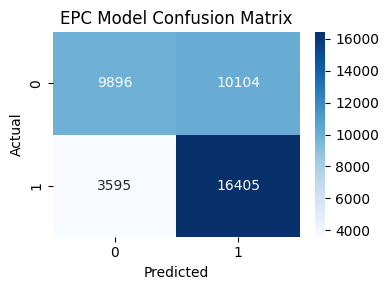

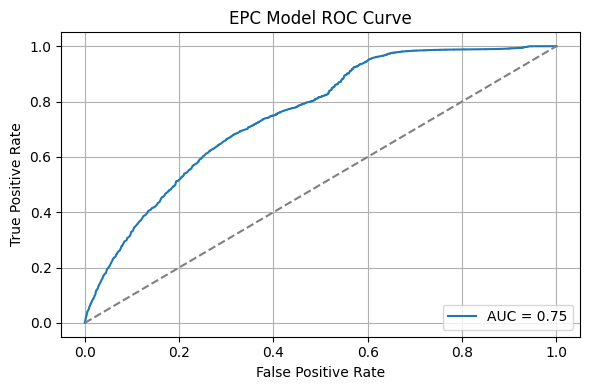


Training EHS model...

EHS Model Evaluation:
              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1297
           1       0.86      0.76      0.81      1390

    accuracy                           0.81      2687
   macro avg       0.82      0.81      0.81      2687
weighted avg       0.82      0.81      0.81      2687

AUC-ROC: 0.883
Confusion Matrix:
 [[1121  176]
 [ 329 1061]]


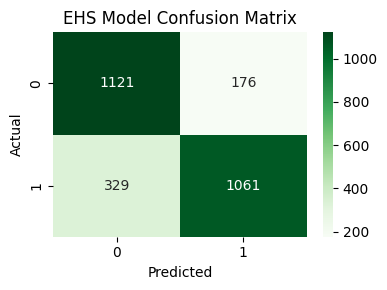

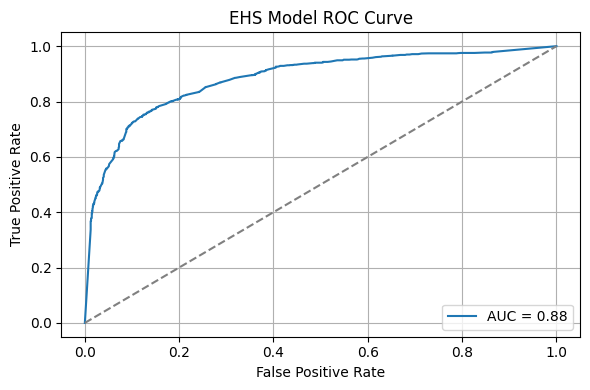


Feature Importances:
household_type: 0.232
household_size: 0.176
tenure_group: 0.164
household_vulnerable: 0.336
gov_region: 0.091

EHS Training Time: 5.5s

Making Prediction...
Prediction Time: 0.150s

Grant Eligibility: Denied


C:\Users\Oke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (classification_report, 
                             confusion_matrix,
                             roc_auc_score,
                             roc_curve)
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ---------------------------
# Memory Optimized EPC Model
# ---------------------------

def prepare_epc_model(epc_df):
    features = ['PROPERTY_TYPE', 'BUILT_FORM', 'gov_region', 'MAIN_FUEL', 'MAINHEAT_DESCRIPTION', 'CONSTRUCTION_AGE_BAND']

    fossil_fuels = {'gas', 'lpg', 'oil', 'coal', 'other'}
    energy_ratings = {'D', 'E', 'F', 'G'}
    
    print("Unique heating types:", epc_df['heating_type'].unique())
    print("Unique energy ratings:", epc_df['CURRENT_ENERGY_RATING'].unique())
    
    fuel_flag = epc_df['heating_type'].isin(fossil_fuels)
    rating_flag = epc_df['CURRENT_ENERGY_RATING'].isin(energy_ratings)
    epc_df['grant_eligible_epc'] = (fuel_flag & rating_flag).astype(int)
    
    positive_samples = epc_df[epc_df['grant_eligible_epc'] == 1]
    if len(positive_samples) == 0:
        raise ValueError("""
        CRITICAL DATA ISSUE: No properties meet eligibility criteria.
        Adjust criteria or validate data sources.
        Heating types present: {}
        Energy ratings present: {}
        """.format(epc_df['heating_type'].unique(),
                   epc_df['CURRENT_ENERGY_RATING'].unique()))
    
    min_samples = min(100_000, len(positive_samples))
    sample_pos = positive_samples.sample(min_samples, random_state=42)
    sample_neg = epc_df[epc_df['grant_eligible_epc'] == 0].sample(min_samples, random_state=42)
    sample_df = pd.concat([sample_pos, sample_neg])
    
    encoder = OrdinalEncoder()
    X = encoder.fit_transform(sample_df[features])
    y = sample_df['grant_eligible_epc']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    model = LogisticRegression(class_weight='balanced', max_iter=1000)
    print("\nTraining EPC model...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print("\nEPC Model Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.3f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("EPC Model Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("EPC Model ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return model, encoder

# ---------------------------
# Optimized EHS Model
# ---------------------------

def prepare_ehs_model(ehs):
    start_time = time.time()
    
    ehs['grant_eligible_ehs'] = (
        (ehs['household_gross_income'] <= 30000) |
        (ehs['receives_housing_benefit'] == 1)
    ).astype(int)
    
    features = ['household_type', 'household_size', 'tenure_group',
                'household_vulnerable', 'gov_region']
    X = ehs[features]
    y = ehs['grant_eligible_ehs']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    
    model = BalancedRandomForestClassifier(
        n_estimators=100,
        sampling_strategy='auto',
        replacement=True,
        random_state=42,
        n_jobs=2
    )
    
    print("\nTraining EHS model...")
    model.fit(X_res, y_res)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print("\nEHS Model Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.3f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title("EHS Model Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("EHS Model ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importances:")
    for name, score in zip(features, model.feature_importances_):
        print(f"{name}: {score:.3f}")
    
    print(f"\nEHS Training Time: {time.time() - start_time:.1f}s")
    
    return model

# ---------------------------
# Optimized Eligibility Checker
# ---------------------------

class BUSEligibilityChecker:
    def __init__(self, epc_model, epc_encoder, ehs_model):
        self.epc_model = epc_model
        self.epc_encoder = epc_encoder
        self.ehs_model = ehs_model
        
    def predict_eligibility(self, epc_data, ehs_data):
        epc_processed = self.epc_encoder.transform(
            epc_data[['PROPERTY_TYPE', 'BUILT_FORM', 'gov_region', 'MAIN_FUEL', 'MAINHEAT_DESCRIPTION', 'CONSTRUCTION_AGE_BAND']]
        )
        epc_pred = self.epc_model.predict(epc_processed)
        ehs_pred = self.ehs_model.predict(ehs_data)
        return (epc_pred & ehs_pred).astype(int)

# ---------------------------
# Usage Example
# ---------------------------

if __name__ == "__main__":
    print("Loading data...")
    # epc_df = pd.read_csv('epc.csv')
    # ehs = pd.read_csv('ehs.csv')

    print("\nTraining Models:")
    epc_model, epc_encoder = prepare_epc_model(epc_df)
    ehs_model = prepare_ehs_model(ehs)
    
    checker = BUSEligibilityChecker(epc_model, epc_encoder, ehs_model)
    
    sample_epc = pd.DataFrame([{
        'PROPERTY_TYPE': 'Flat',
        'BUILT_FORM': 'Mid-Terrace',
        'gov_region': 'London',
        'MAIN_FUEL': 'electricity (not community)',
        'MAINHEAT_DESCRIPTION': 'Electric storage heaters',
        'CONSTRUCTION_AGE_BAND': 'England and Wales: 1983-1990',
    }])
    
    sample_ehs = [[
        3,  # household_type
        2,  # household_size
        3,  # tenure_group
        0,  # household_vulnerable
        1   # gov_region
    ]]
    
    print("\nMaking Prediction...")
    pred_start = time.time()
    eligibility = checker.predict_eligibility(sample_epc, sample_ehs)
    print(f"Prediction Time: {time.time() - pred_start:.3f}s")
    print(f"\nGrant Eligibility: {'Approved' if eligibility[0] else 'Denied'}")
